# Build and Interpret a Polynomial Regression Model
In this notebook we will illustrate the polynomial regression model with the ozone dataset [link of the course](https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6233046-build-and-interpret-a-polynomial-regression-model)


In [11]:
import pandas as pd
df=pd.read_csv("data/ozone.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [12]:
df=df.drop(columns=["Month","Day"])
df=df.rename(columns={"Solar.R":"Solar"})
df.dropna(inplace=True)

In [13]:
df.shape

(111, 4)

In [14]:
df.head()

,Ozone,Solar,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65


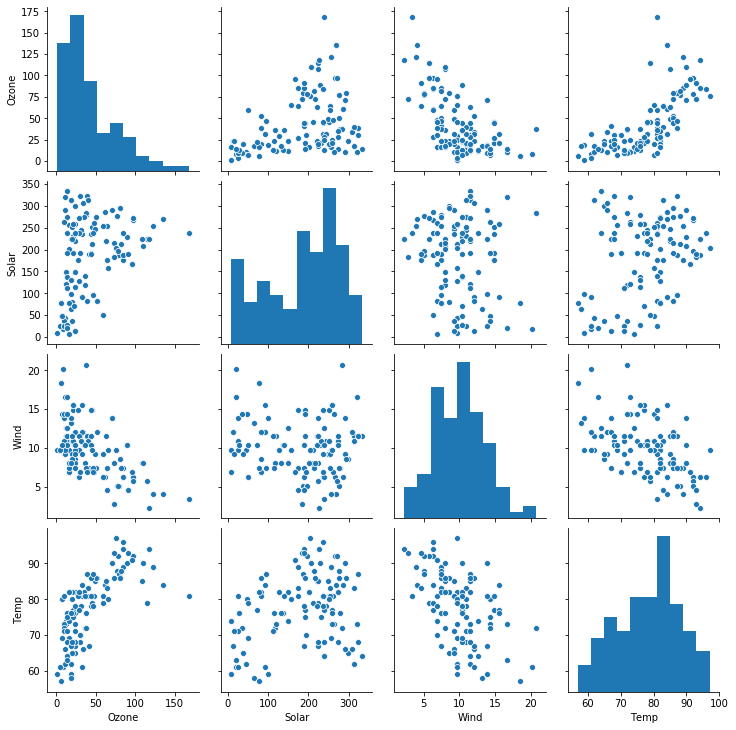

In [15]:
import seaborn as sns
sns.pairplot(df)

These scatter plots are all far from being nice and linear. In particular, the curvature in the scatter plot Ozone vs. Wind is an indication of nonlinearity between the variables.

Lets interest us to the influence of the wind in the amount of Ozone

In [17]:
import statsmodels.formula.api as smf
M1=smf.ols(formula="Ozone ~ Wind",data=df).fit()
M1.rsquared

0.3751520559966308

The R squared is low 37% so we can trust to this reliability of this model

Let's add the powers of the wind in a model

In [20]:
for i in range(2,6):
    df["Wind_{}".format(i)]=df.Wind**i

In [21]:
df

,Ozone,Solar,Wind,Temp,Wind_2,Wind_3,Wind_4,Wind_5
0,41.0,190.0,7.4,67,54.76,405.224,2998.6576,2.219007e+04
1,36.0,118.0,8.0,72,64.00,512.000,4096.0000,3.276800e+04
2,12.0,149.0,12.6,74,158.76,2000.376,25204.7376,3.175797e+05
3,18.0,313.0,11.5,62,132.25,1520.875,17490.0625,2.011357e+05
6,23.0,299.0,8.6,65,73.96,636.056,5470.0816,4.704270e+04
...,...,...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,275.56,4574.296,75933.3136,1.260493e+06
148,30.0,193.0,6.9,70,47.61,328.509,2266.7121,1.564031e+04
150,14.0,191.0,14.3,75,204.49,2924.207,41816.1601,5.979711e+05
151,18.0,131.0,8.0,76,64.00,512.000,4096.0000,3.276800e+04


In [38]:
M1 = smf.ols('Ozone ~ Wind ',data=df).fit()
M2 = smf.ols('Ozone ~ Wind + Wind_2' ,data=df).fit()
M3 = smf.ols('Ozone ~ Wind + Wind_2+ Wind_3',data=df).fit()
M4 = smf.ols('Ozone ~ Wind + Wind_2+ Wind_3 + Wind_4',data=df).fit()
M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     65.44
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           9.09e-13
Time:                        12:06:32   Log-Likelihood:                -519.94
No. Observations:                 111   AIC:                             1044.
Df Residuals:                     109   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.0413      7.472     13.254      0.000      84.231     113.851
Wind          -5.7288      0.708     -8.090      0.000      -7.132      -4.325
==============================================================================
Omnibus:                        9.375   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.508
Skew:                           0.708   Prob(JB):                      0.00862
Kurtosis:                       3.228   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     55.20
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           3.06e-17
Time:                        12:05:16   Log-Likelihood:                -506.96
No. Observations:                 111   AIC:                             1020.
Df Residuals:                     108   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.7663     14.344     11.626      0.000     138.334     195.198
Wind         -19.9586      2.741     -7.281      0.000     -25.392     -14.525
Wind_2         0.6621      0.124      5.335      0.000       0.416       0.908
==============================================================================
Omnibus:                        7.370   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.308
Skew:                           0.626   Prob(JB):                       0.0259
Kurtosis:                       3.105   Cond. No.                         888.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
M3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           8.56e-17
Time:                        12:05:24   Log-Likelihood:                -505.79
No. Observations:                 111   AIC:                             1020.
Df Residuals:                     107   BIC:                             1030.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    201.5751     27.191      7.413      0.000     147.672     255.478
Wind         -31.8274      8.351     -3.811      0.000     -48.383     -15.272
Wind_2         1.8401      0.793      2.320      0.022       0.268       3.412
Wind_3        -0.0349      0.023     -1.504      0.136      -0.081       0.011
==============================================================================
Omnibus:                        8.294   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.233
Skew:                           0.659   Prob(JB):                       0.0163
Kurtosis:                       3.205   Cond. No.                     2.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion
These results show that adding new powers of the original variable does increase the performance of the model (R-squared increases, log-likelihood decreases). However, the p-values for the coefficients show that the coefficients M1 and M2 are reliable; but for M3, the p-value associated with Wind3 is well above 0.05 and can't be trusted.